In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
unicorns = pd.read_csv(r'C:\Users\frans\Documents\GitHub\Project4-WebScrap\Files\FinalUnicorns.csv')
unicorns.head()

,Unnamed: 0,Name,Country,Industry,Valuation ($ Billion)
0,0,Bytedance,China,Artificial intelligence,140.0
1,1,SpaceX,United States,Other,100.3
2,2,Shein,China,E-commerce & direct-to-consumer,100.0
3,3,Stripe,United States,Fintech,95.0
4,4,Klarna,Sweden,Fintech,45.6


Text(0.5, 0, 'Unicron Name')

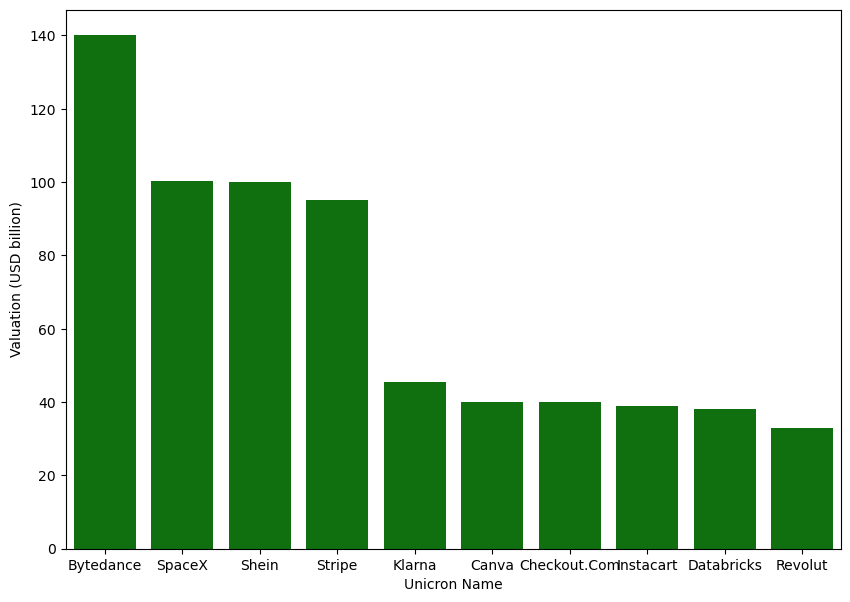

In [38]:
### Top Unicorns x Valuation

# Grab the data
TopUxV = unicorns[['Name','Valuation ($ Billion)']].sort_values(by = 'Valuation ($ Billion)', ascending=False)[:10]

# Plot
fig01, ax = plt.subplots(figsize = (10, 7))
sns.barplot(data = TopUxV, x ='Name', y ='Valuation ($ Billion)', color = 'Green')
ax.set_ylabel('Valuation (USD billion)')
ax.set_xlabel('Unicron Name')

Text(0.5, 0, 'Number of unicorns')

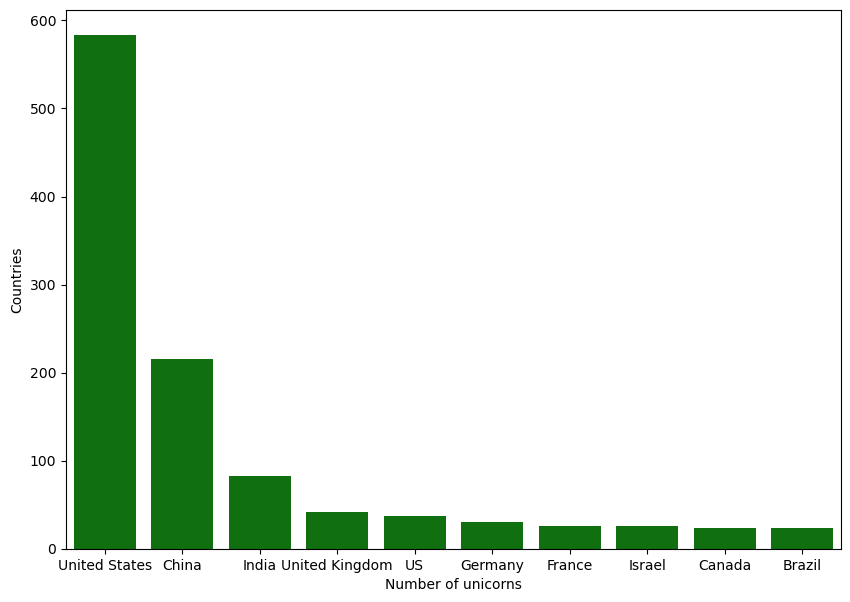

In [84]:
### Top Countries x Num of Unicorns

# Plot
fig02, ax = plt.subplots(figsize = (10, 7))
sns.countplot( x = 'Country', data = unicorns, color="Green", order=unicorns.Country.value_counts().index[:10])
ax.set_ylabel('Countries')
ax.set_xlabel('Number of unicorns')

In [9]:
### Top Countries x Valutions 

In [10]:
### Top Industries x Num of unicorns

In [11]:
### Top Industries x Valuation

In [12]:
### Top Unicorn per industry

In [13]:
### Top Industry x Country